In [24]:
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

iris = datasets.load_iris()

In [25]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3)


In [35]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(X=x_train,y=y_train)
print("train",clf.score(x_train,y_train))
print("test",clf.score(x_test,y_test))

train 0.9809523809523809
test 0.9555555555555556


In [27]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_1 <= 2.80
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  2.80
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- class: 2



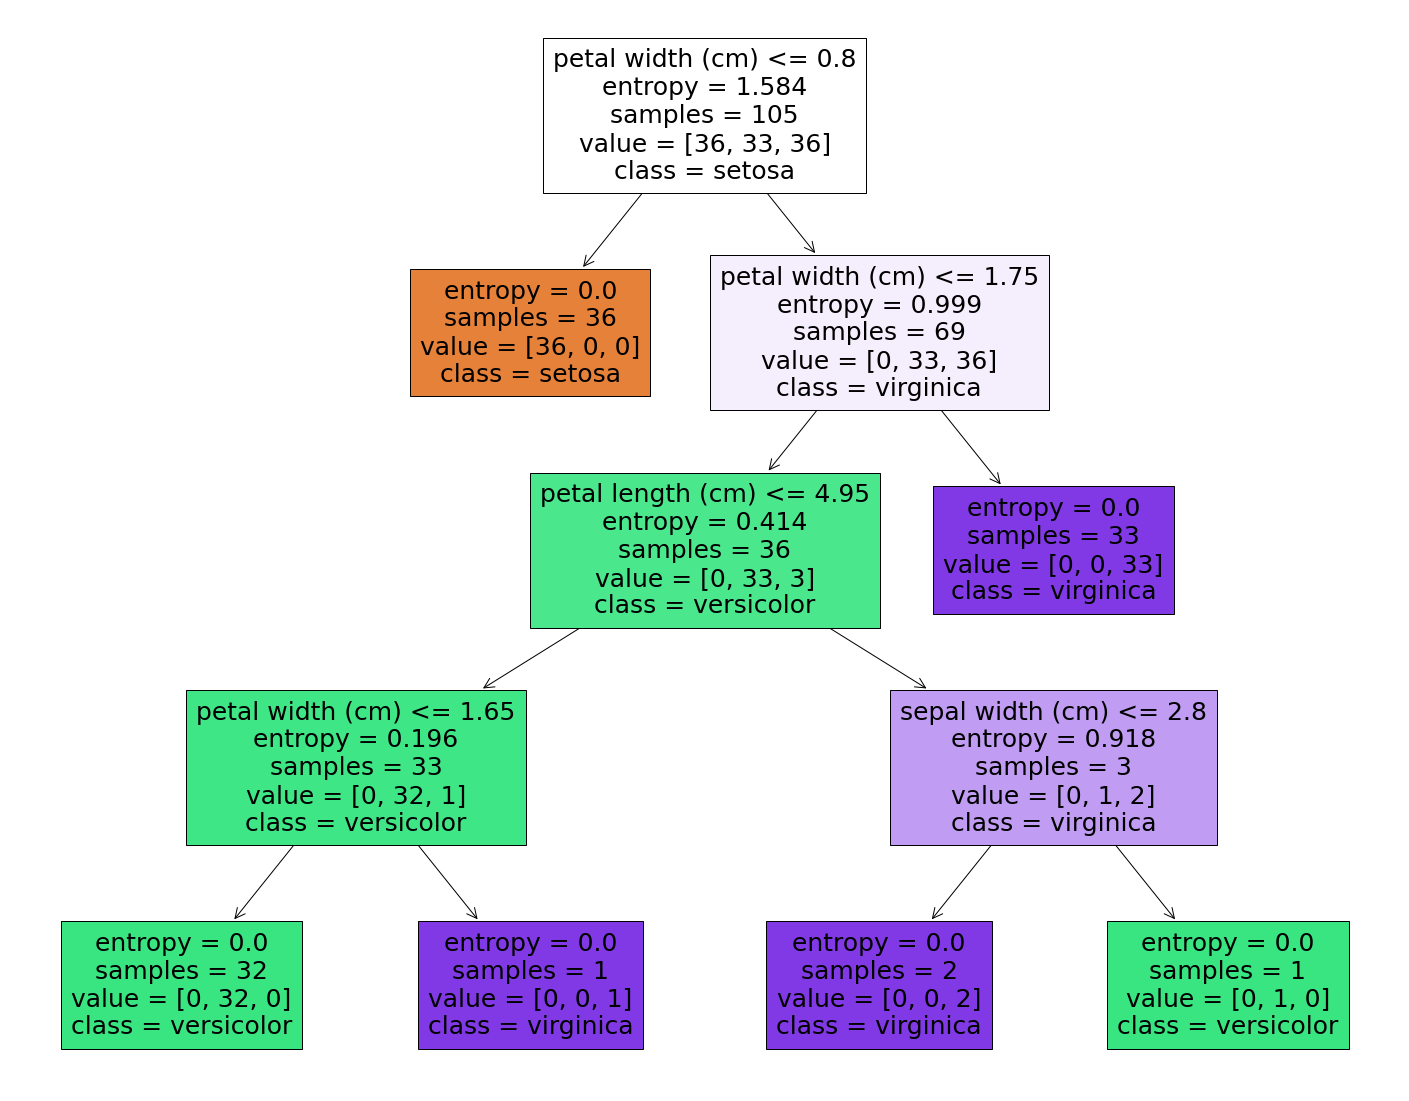

In [28]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    clf, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,
    filled=True
)


In [37]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini',max_depth=3).fit(X=x_train,y=y_train)
clf_gini.score(x_test,y_test)

0.9555555555555556